### 2022-09-13 Emily Meeting

Some plots to show the status of animal training on an animal by animal basis. Specifically focusing on the last month when training has stabilized and stage 8 encompasses many things. 

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import datajoint as dj
import pandas as pd
import os
import seaborn as sns
import pandas as pd
from pathlib import Path
from datetime import date, timedelta

from io_utils import *

# settings
%load_ext autoreload
%autoreload 2
dj.blob.use_32bit_dims = True # necessary for pd.blob read
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
def plot_stage_and_trials(df, ax, title=None):
    title = "Stage & Trials Plot" if title is None else title
    sns.lineplot(data=df.groupby('date').max().trial, color="darkorange", ax=ax)
    _ = plt.xticks(rotation=45)
    ax.set(ylabel = "trials per session", title=title)
    # ax.legend(['hits'])

    ax2 = ax.twinx()
    sns.lineplot(data=df.groupby('date').max().stage, drawstyle='steps-post', color="black", ax=ax2)
    ax2.set_yticks(np.arange(1,df['stage'].max() + 1, 1))
    ax2.set(ylabel = "stage number")
    
    ax2.legend(['stage'], borderaxespad=0,frameon=False)


def plot_stage(df, ax, title=None, **kwargs):
    title = "Stage Plot" if title is None else title
    sns.lineplot(data=df.groupby('date').max().stage, 
                drawstyle='steps-post', ax=ax, **kwargs)

    _ = plt.xticks(rotation=45)
    _ = plt.yticks(np.arange(1,11, 1))
    _ = ax.set(ylabel = "stage number", title=title)
    sns.despine()

def plot_trials(df, ax, title=None, **kwargs):
    title = "Trial Plot" if title is None else title
    sns.lineplot(data=df.groupby('date').max().trial, 
                ax=ax, **kwargs)

    _ = plt.xticks(rotation=45)
    _ = ax.set(ylabel = "trials per session", title=title)
    sns.despine()

def plot_hits(df, ax, title=None, **kwargs):
    title = "Hit Plot" if title is None else title
    sns.lineplot(data=df, x="date", y="hits", 
                 ci=None, ax=ax, **kwargs)
    
    _ = plt.xticks(rotation=45)
    _ = ax.set(ylabel="fraction correct", title=title,ylim=[0,1])
    sns.despine()

def plot_viols(df, ax, title=None, **kwargs):
    title = "Violation Plot" if title is None else title
    sns.lineplot(data=df, x="date", y="violations", 
                ci=None, ax=ax, **kwargs)
    _ = plt.xticks(rotation=45)
    _ = ax.set(ylabel="fraction violation", title=title,ylim=[0,1])
    sns.despine()


def plot_hits_and_viols(df, ax, title=None):
    title = "Hit & Viol Plot" if title is None else title
    
    sns.lineplot(data=df, x="date", y="hits",
                 color='seagreen', ci=None, ax=ax)
    sns.lineplot(data=df, x="date", y="violations", 
                 color='firebrick', ci=None, ax=ax)
    
    _ = plt.xticks(rotation=45)
    _ = ax.set(ylabel="fraction correct | viol", title=title,ylim=[0,1])
    ax.legend(['hits', 'viols'], bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0,frameon=False)
    sns.despine()


def plot_pair_performance(df, ax, title=None):
    title = "Pair Perf Plot" if title is None else title

    perf_by_sound = df.pivot_table(
            index='date', 
            columns='sound_pair', 
            values='hits', 
            aggfunc='mean'
        )

    colors = { 
            "3.0, 3.0" : "skyblue", 
            "12.0, 12.0" : "steelblue", 
            "3.0, 12.0" : "thistle",
            "12.0, 3.0" : "mediumorchid"
        }

    perf_by_sound.plot.line(color=colors, ax=ax, rot = 45)
    
    _ = ax.set(ylim=[0,1], ylabel="fraction correct")
    sns.despine()
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0,frameon=False)




In [102]:
df_all = fetch_latest_protocol_data()
antibias_working = pd.Timestamp(2022,8,5) # the day antibias was fixed
training_stabilizing = pd.Timestamp(2022,8,17)
df_antib =  df_all[(df_all['date'] > antibias_working)]
df_stable = df_all[(df_all['date'] > training_stabilizing)]

[2022-09-18 19:17:14,159][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 59 sessions for R500
fetched 61 sessions for R501
fetched 64 sessions for R502
fetched 60 sessions for R503
fetched 62 sessions for R600


### R500

Reached 3 days > 70% at 3-3, 3-12 pairs. Just switched to 12-12, 12-3 and performance has declined around ~30% suggesting sb discrimination rule was being used (i.e. 3 --> left, 12 --> right). Gray bars indicate start of 3-3, 3-12 (lighter) and switch to 12-12, 12-3 (darker).

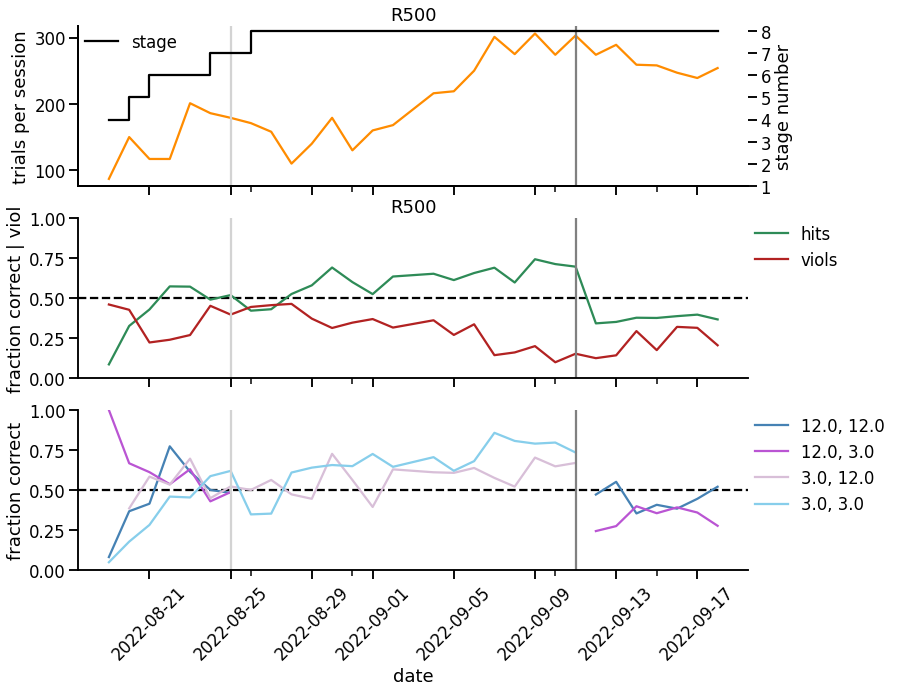

In [103]:
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
animal_id = 'R500'
df = df_stable.query("animal_id == 'R500'")
plot_stage_and_trials(df, axs[0], animal_id)
plot_hits_and_viols(df, axs[1], animal_id)
plot_pair_performance(df, axs[2], animal_id)

for iax in range(len(axs)):
    axs[iax].axvline(pd.Timestamp('2022-08-25'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-09-11'), color='gray')
    if iax > 0:
        axs[iax].axhline(0.5, color='k', linestyle='--', zorder=1)


### R501

Was a superstar on the timing but rule learning has been slow for this guy. Got him motivated again after a dip but performance is pretty stable.

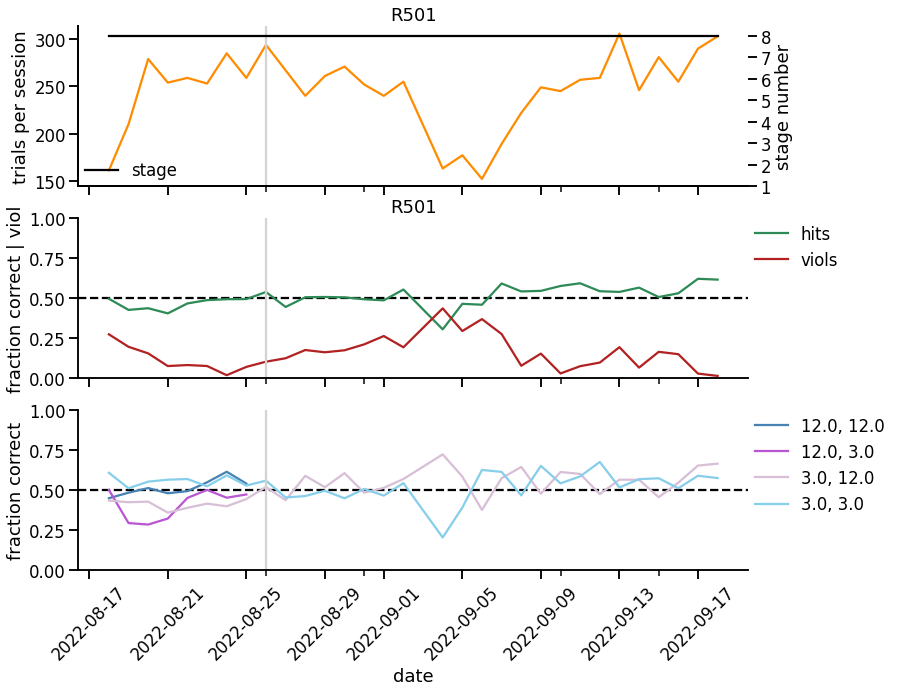

In [104]:
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
animal_id = 'R501'
df = df_stable.query("animal_id == 'R501'")
plot_stage_and_trials(df, axs[0], animal_id)
plot_hits_and_viols(df, axs[1], animal_id)
plot_pair_performance(df, axs[2], animal_id)

for iax in range(len(axs)):
    axs[iax].axvline(pd.Timestamp('2022-08-26'),color='lightgray')
    if iax > 0:
        axs[iax].axhline(0.5, color='k', linestyle='--', zorder=1)


### R502

This animal is super motivated but is doing really, really short fixations (~ 0.5s) because he has one pace of center left center right. 

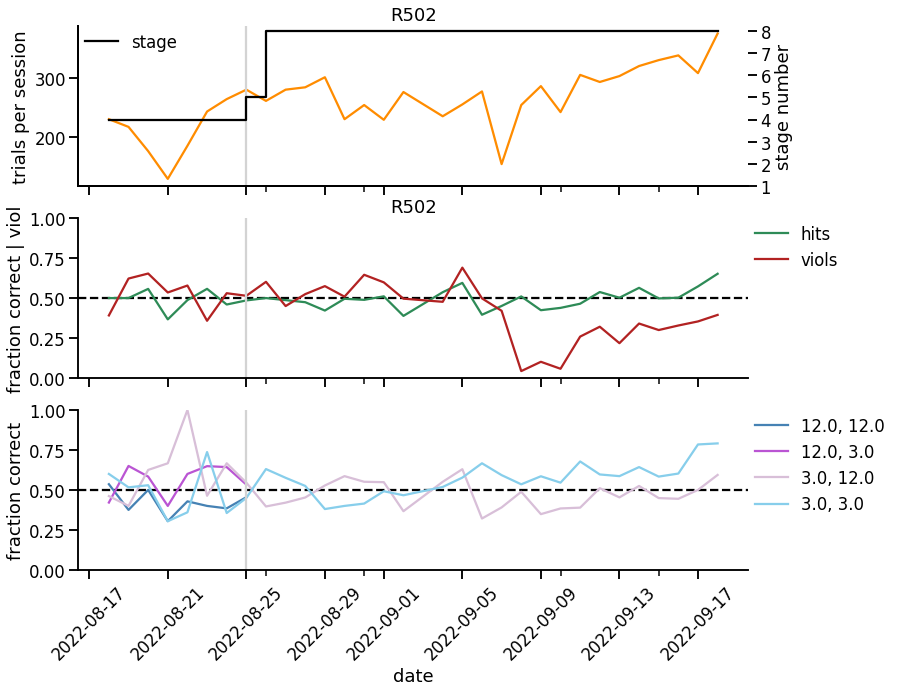

In [105]:
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
animal_id = 'R502'
df = df_stable.query("animal_id == 'R502'")
plot_stage_and_trials(df, axs[0], animal_id)
plot_hits_and_viols(df, axs[1], animal_id)
plot_pair_performance(df, axs[2], animal_id)

for iax in range(len(axs)):
    axs[iax].axvline(pd.Timestamp('2022-08-25'),color='lightgray')
    if iax > 0:
        axs[iax].axhline(0.5, color='k', linestyle='--', zorder=1)


### R503

Similar to R501, hit 3 days at 70% correct at 3-3, 3-12 and is now on the second set of pairs (12-12, 12-3) and a bit stuck. Unfortunately, violations appear to be rising too.

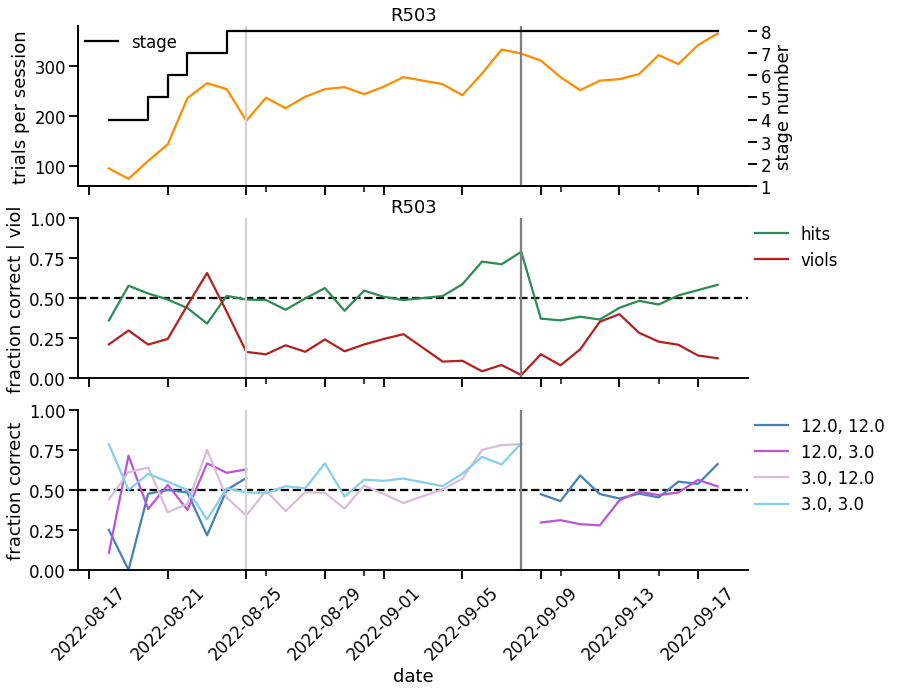

In [106]:
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
animal_id = 'R503'
df = df_stable.query("animal_id == 'R503'")
plot_stage_and_trials(df, axs[0], animal_id)
plot_hits_and_viols(df, axs[1], animal_id)
plot_pair_performance(df, axs[2], animal_id)

for iax in range(len(axs)):
    axs[iax].axvline(pd.Timestamp('2022-08-25'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-09-08'),color='gray')
    if iax > 0:
        axs[iax].axhline(0.5, color='k', linestyle='--', zorder=1)


### R600

Might be ready to switch into the second set of pairs. Hovering above chance but not doing amazing.

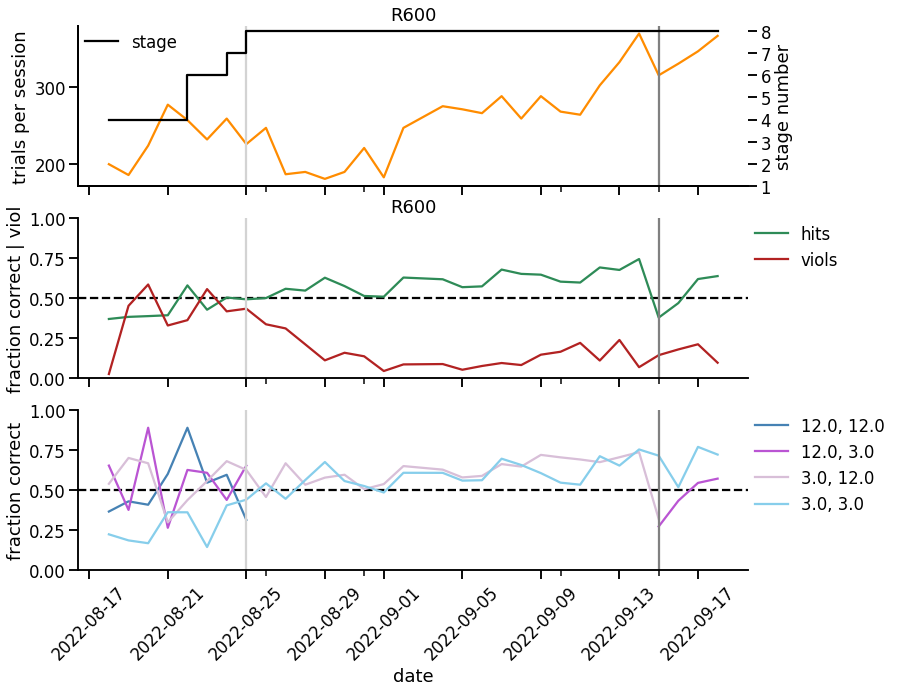

In [107]:
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
animal_id = 'R600'
df = df_stable.query("animal_id == 'R600'")
plot_stage_and_trials(df, axs[0], animal_id)
plot_hits_and_viols(df, axs[1], animal_id)
plot_pair_performance(df, axs[2], animal_id)

for iax in range(len(axs)):
    axs[iax].axvline(pd.Timestamp('2022-08-25'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-09-15'),color='gray')
    if iax > 0:
        axs[iax].axhline(0.5, color='k', linestyle='--', zorder=1)
